In [1]:
from pycaret.regression import *

In [2]:
# importing the module
import pandas as pd

# importing the regression dataset
Dushanbe = pd.read_csv("Dushanbe_house.csv")

# heading
Dushanbe.head()

,Unnamed: 0,number_of_rooms,floor,area,latitude,longitude,price
0,0,1,1,58.0,38.585834,68.793715,330000
1,1,1,14,68.0,38.522254,68.749918,340000
2,2,3,8,50.0,NaN,NaN,700000
3,3,3,14,84.0,38.520835,68.747908,700000
4,4,3,3,83.0,38.564374,68.739419,415000


In [3]:
# dropping the unnacessary column
Dushanbe.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
#null values
Dushanbe.isnull().sum()

number_of_rooms       0
floor                 0
area                  0
latitude           1849
longitude          1849
price                 0
dtype: int64

In [5]:
# importing the plotly module
import plotly.express as px

# plotting 3-d plot
fig = px.scatter_3d(Dushanbe, x='number_of_rooms', y='floor', z='price',
              color='price')
fig.show()


In [6]:
Dushanbe.shape

(5579, 6)

In [7]:
# Importing the pycarte regression module
from pycaret.regression import *

# setting up the environment
Step = setup(data =Dushanbe, target = 'price', session_id=123)

,Description,Value
0,session_id,123
1,Target,price
2,Original Data,"(5579, 6)"
3,Missing Values,True
4,Numeric Features,4
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3905, 10)"


In [8]:
# comparing best fitted models 
best_models = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,130452.4132,72463496043.2807,251736.1674,0.6203,0.3653,1.2177,0.0430
ridge,Ridge Regression,138424.1912,75993508994.9056,257814.1448,0.6028,0.3877,1.0840,0.0120
lasso,Lasso Regression,138297.5367,76075087906.2496,257894.0155,0.6026,0.3877,1.0865,0.0100
lar,Least Angle Regression,138296.0586,76075507251.3743,257894.3534,0.6026,0.3877,1.0865,0.0080
llar,Lasso Least Angle Regression,138292.8683,76074135318.6244,257891.4797,0.6026,0.3877,1.0864,0.0110
lr,Linear Regression,138296.1569,76075449121.6208,257894.2512,0.6026,0.3877,1.0865,0.7270
br,Bayesian Ridge,138806.8519,75917256511.6136,257878.8222,0.6024,0.3892,1.0880,0.0090
en,Elastic Net,139443.3291,76279356871.9295,258720.0040,0.5995,0.3955,1.1122,0.0740
huber,Huber Regressor,135123.0403,76808776968.2274,259147.2939,0.5989,0.3828,0.9963,0.0470
gbr,Gradient Boosting Regressor,132568.8751,78259263802.1682,261851.5982,0.5892,0.3702,1.3683,0.0880


In [9]:
# comparing best fitted models 
best_models = compare_models(sort ='MAE', fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,129285.0982,82458334902.6306,281138.0322,0.5255,0.3716,1.2855,1.3880
lightgbm,Light Gradient Boosting Machine,131658.0908,73587278152.5340,261029.9278,0.5966,0.3689,1.2063,0.0320
gbr,Gradient Boosting Regressor,132070.0016,76967535312.4106,267506.6904,0.5763,0.3725,1.4550,0.0740
et,Extra Trees Regressor,133968.2301,80264375261.3618,275113.4704,0.5518,0.3867,1.6683,0.1820
rf,Random Forest Regressor,134282.9897,79010994281.4751,273008.8180,0.5574,0.3829,1.4896,0.1980
huber,Huber Regressor,135188.0856,76690885185.0974,265822.3969,0.5820,0.3847,0.9973,0.0460
llar,Lasso Least Angle Regression,138533.5905,76120595117.9904,264736.9987,0.5854,0.3897,1.0902,0.0100
lr,Linear Regression,138537.5969,76122751540.6889,264741.5925,0.5854,0.3897,1.0903,0.0080
lar,Least Angle Regression,138537.6703,76122819986.0146,264741.7184,0.5854,0.3897,1.0903,0.0100
lasso,Lasso Regression,138538.9455,76122348615.4433,264740.8345,0.5854,0.3897,1.0903,0.0120


In [10]:
# Importing the pycarte regression module
from pycaret.regression import *

# printing all the regression models 
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [11]:
# creating lightGBM model
LGBM = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,137541.1222,45663613435.7054,213690.4617,0.7110,0.4038,0.5280
1,126036.9450,47579161732.1190,218126.4810,0.6415,0.3179,0.2581
2,111404.8746,35691515964.2672,188921.9838,0.7104,0.2895,0.2297
3,119705.2403,31700733429.4206,178046.9978,0.6800,0.3512,0.3063
4,141446.3144,110704764206.7548,332723.2547,0.5621,0.3281,0.2409
5,130812.3445,61876934470.6011,248750.7477,0.5450,0.3745,0.3130
6,156738.5087,251243240442.6878,501241.6986,0.2869,0.3510,0.2614
7,131391.5516,49824728678.5335,223214.5351,0.6607,0.3192,0.2596
8,138515.4077,66240491960.5388,257372.2828,0.6103,0.5082,8.9983


In [12]:
# printing the model parameters
print(LGBM)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [13]:
# Tuning the model
LGBM_tunned = tune_model(LGBM)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,137362.3655,49319045273.3060,222078.9168,0.6879,0.3951,0.4727
1,133332.1900,51152973932.9252,226170.2322,0.6146,0.3271,0.2693
2,114453.4929,34087692955.4062,184628.5269,0.7235,0.2924,0.2361
3,113763.6369,24813837107.1079,157524.0842,0.7495,0.3544,0.3072
4,145503.4340,121962067404.3014,349230.6794,0.5176,0.3360,0.2461
5,128494.7303,57681853029.3293,240170.4666,0.5759,0.3654,0.3116
6,157757.3008,263508747916.2666,513331.0315,0.2521,0.3575,0.2595
7,125097.3411,47553333279.7078,218067.2678,0.6761,0.3083,0.2480
8,142054.1601,67077689488.3933,258993.6090,0.6053,0.4942,5.6510


In [14]:
# printing the optimum parameters
print(LGBM_tunned)

LGBMRegressor(bagging_fraction=0.7, bagging_freq=6, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=66, min_child_weight=0.001, min_split_gain=0.4,
              n_estimators=90, n_jobs=-1, num_leaves=90, objective=None,
              random_state=123, reg_alpha=0.0005, reg_lambda=0.1, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


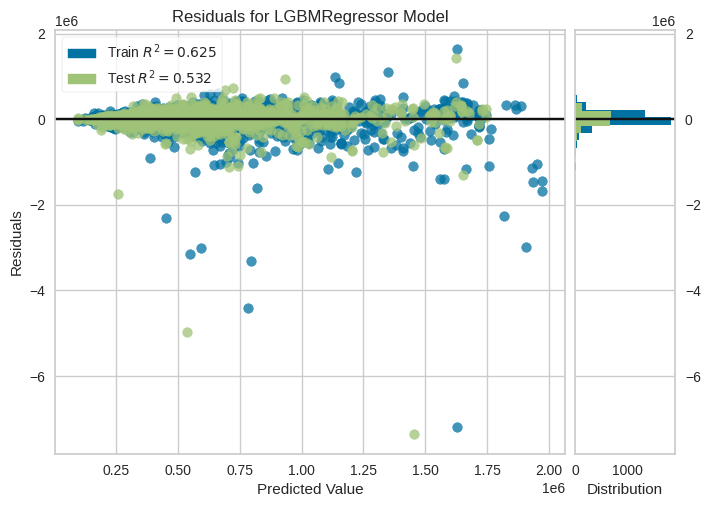

In [15]:
# Plotting the residual plot
plot_model(LGBM_tunned, plot='residuals')

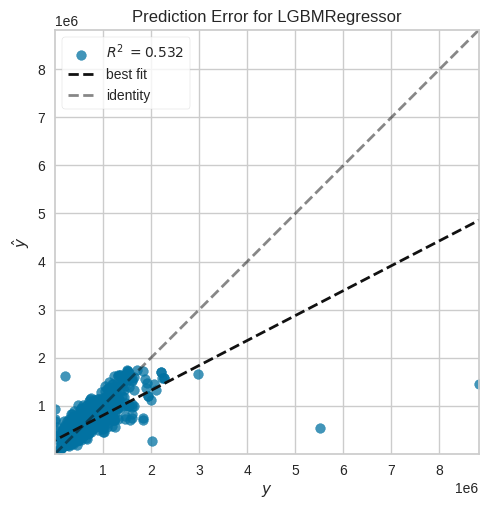

In [16]:
# Plotting the errpr plot
plot_model(LGBM_tunned, plot='error')


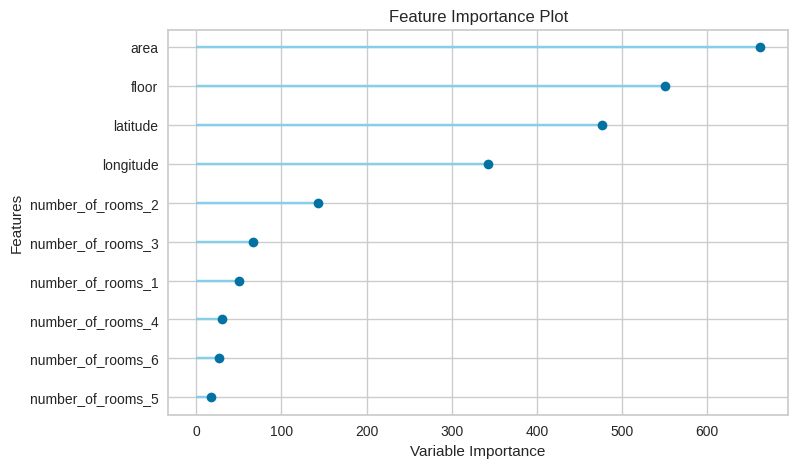

In [17]:
# Plotting the feature importance
plot_model(LGBM_tunned, plot='feature')

In [18]:
# evaluating the model
evaluate_model(LGBM_tunned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [19]:
# predictions
predict_model(LGBM_tunned)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,126832.3541,80896186129.9168,284422.5486,0.5321,0.5045,3.3297


,floor,area,latitude,longitude,number_of_rooms_1,number_of_rooms_2,number_of_rooms_3,number_of_rooms_4,number_of_rooms_5,number_of_rooms_6,price,Label
0,3.0,48.0,38.523460,68.749519,0.0,1.0,0.0,0.0,0.0,0.0,440000,4.556845e+05
1,11.0,142.0,38.553249,68.768654,0.0,0.0,0.0,0.0,1.0,0.0,971710,1.020511e+06
2,13.0,90.0,38.553249,68.768654,0.0,0.0,1.0,0.0,0.0,0.0,379000,6.366442e+05
3,9.0,120.0,38.570683,68.789726,0.0,0.0,1.0,0.0,0.0,0.0,1450000,9.879785e+05
4,5.0,103.0,38.553249,68.768654,0.0,0.0,0.0,1.0,0.0,0.0,581950,7.217841e+05
...,...,...,...,...,...,...,...,...,...,...,...,...
1669,2.0,90.0,38.553249,68.768654,0.0,0.0,0.0,0.0,1.0,0.0,750000,7.329058e+05
1670,3.0,75.0,38.550716,68.830544,0.0,1.0,0.0,0.0,0.0,0.0,548000,5.523201e+05
1671,3.0,90.0,38.587170,68.786995,0.0,0.0,0.0,1.0,0.0,0.0,800000,7.806858e+05
1672,1.0,77.0,38.530575,68.776299,0.0,0.0,1.0,0.0,0.0,0.0,570000,4.857536e+05


In [20]:
# saving the model
save_model(LGBM_tunned,'LightGBM model for House priceing')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                                colsample_bytree=1.0, feature_fraction=0.5,
                                importance_type='split', learning_rate=0.1,
                                max_depth=-1, min_child_samples=66,
                                min_child_weight=0.001, min_split_gain=0.4,
                 

In [21]:
# loading model
saved_model_lightgbm = load_model('LightGBM model for House priceing')

Transformation Pipeline and Model Successfully Loaded


### PyCaret for classification problems

In [22]:
# importing pycaret datasets module
from pycaret.datasets import get_data

# loading the dataset
heart_disease = get_data('heart_disease')

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [23]:
# shape of the dataset
heart_disease.shape

(270, 14)

In [24]:
heart_disease['Disease'].value_counts()

0    150
1    120
Name: Disease, dtype: int64

In [25]:
# missing values
heart_disease.isnull().sum()


age                                     0
sex                                     0
chest pain type                         0
resting blood pressure                  0
serum cholestoral in mg/dl              0
fasting blood sugar > 120 mg/dl         0
resting electrocardiographic results    0
maximum heart rate achieved             0
exercise induced angina                 0
oldpeak                                 0
slope of peak                           0
number of major vessels                 0
thal                                    0
Disease                                 0
dtype: int64

In [26]:
# importing the pycaret for classification module
from pycaret.classification import *

# setting up model
clf_model = setup(data = heart_disease, target = 'Disease')

,Description,Value
0,session_id,5722
1,Target,Disease
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(270, 14)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [27]:
# comparing classification models
clf_best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8889,0.0000,0.8139,0.9246,0.8558,0.7672,0.7793,0.0060
lr,Logistic Regression,0.8781,0.9303,0.8139,0.9052,0.8455,0.7461,0.7590,0.0890
lda,Linear Discriminant Analysis,0.8728,0.9235,0.8014,0.9052,0.8334,0.7335,0.7492,0.0410
catboost,CatBoost Classifier,0.8520,0.9018,0.7778,0.8708,0.8138,0.6925,0.7017,1.3080
lightgbm,Light Gradient Boosting Machine,0.8304,0.8966,0.7431,0.8623,0.7855,0.6484,0.6643,0.0670
et,Extra Trees Classifier,0.8257,0.8791,0.7167,0.8613,0.7737,0.6353,0.6496,0.0930
rf,Random Forest Classifier,0.8199,0.9039,0.7306,0.8478,0.7717,0.6263,0.6425,0.0850
gbc,Gradient Boosting Classifier,0.8149,0.8786,0.7292,0.8109,0.7567,0.6122,0.6206,0.0340
nb,Naive Bayes,0.8038,0.8862,0.8764,0.7404,0.7962,0.6125,0.6304,0.0060
ada,Ada Boost Classifier,0.7772,0.8565,0.7694,0.7359,0.7384,0.5473,0.5644,0.0430


In [28]:
# creating logistic regression model
LR = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8421,0.8977,0.7500,0.8571,0.8000,0.6705,0.6746
1,0.7895,0.8977,0.5000,1.0000,0.6667,0.5366,0.6055
2,0.8947,0.9773,0.8750,0.8750,0.8750,0.7841,0.7841
3,0.8947,0.9545,0.8750,0.8750,0.8750,0.7841,0.7841
4,0.8421,0.9091,0.8750,0.7778,0.8235,0.6816,0.6854
5,0.9474,1.0000,0.8750,1.0000,0.9333,0.8902,0.8956
6,0.8421,0.7386,0.6250,1.0000,0.7692,0.6587,0.7008
7,0.8947,0.9778,0.8889,0.8889,0.8889,0.7889,0.7889
8,0.8333,0.9500,0.8750,0.7778,0.8235,0.6667,0.6708


In [29]:
# printing parameter values
print(LR)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5722, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


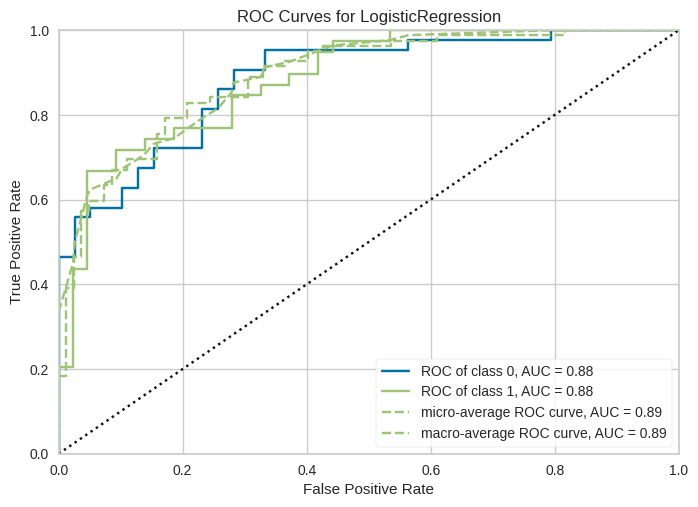

In [30]:
# plotting AUC
plot_model(LR, plot = 'auc')

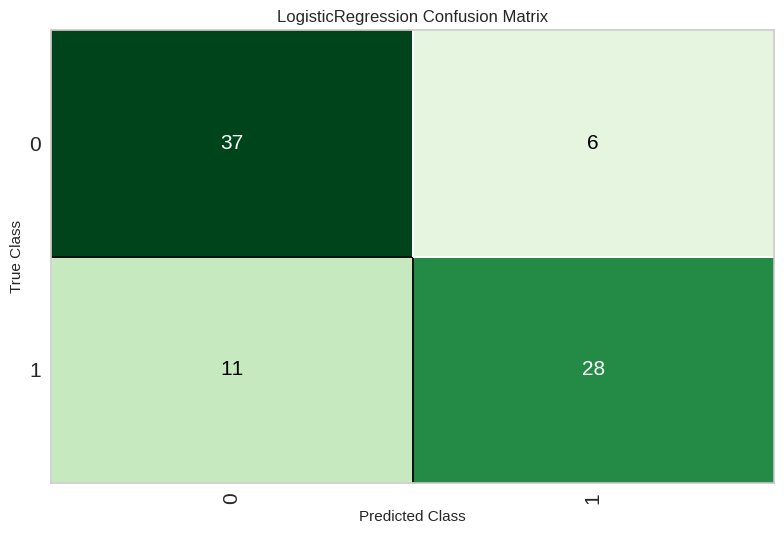

In [31]:
# plotting confusion matrix
plot_model(LR , plot = 'confusion_matrix')

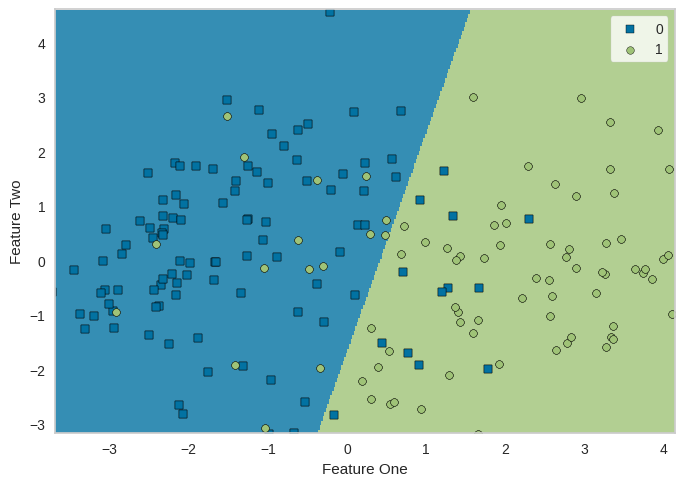

In [32]:
# plotting boundary plot
plot_model(LR, plot = 'boundary', use_train_data = True)

In [33]:
evaluate_model(LR)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [34]:
# making predictions
predict_model(LR)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7927,0.8849,0.7179,0.8235,0.7671,0.5819,0.5863


,age,resting blood pressure,serum cholestoral in mg/dl,maximum heart rate achieved,oldpeak,sex_1,chest pain type_1,chest pain type_2,chest pain type_3,chest pain type_4,...,number of major vessels _0,number of major vessels _1,number of major vessels _2,number of major vessels _3,thal_3,thal_6,thal_7,Disease,Label,Score
0,50.0,120.0,219.0,158.0,1.6,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.9810
1,65.0,110.0,248.0,158.0,0.6,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1,0.5257
2,63.0,130.0,330.0,132.0,1.8,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1,0.9704
3,41.0,130.0,214.0,168.0,2.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.7668
4,53.0,130.0,197.0,152.0,1.2,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.9446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,46.0,138.0,243.0,152.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.5490
78,57.0,165.0,289.0,124.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1,0.9938
79,52.0,108.0,233.0,147.0,0.1,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1,0.5001
80,54.0,110.0,214.0,158.0,1.6,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.9897


In [35]:
# saving the model
save_model('LR', 'Logistic regression')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Disease',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                 ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='Disease')),
                 (